In [1]:
import pandas as pd
import numpy as np
import skimage
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from skimage.io import imread, imsave

In [3]:
import os

In [4]:
data_folder = '../data'
images_folder = os.path.join(data_folder,'new_roof_images/resampled')
ids = pd.read_csv('../data/new_roof_images/id_train_resampled.csv')

In [5]:
import helpers as H
import functools
reload(H)
H.images_folder = images_folder
H.default_extension = '.bmp'
open_image_id = H.open_image_id

In [6]:
max_sides_list = [max(open_image_id(Id).shape[:2]) for ind, (Id, label) in ids.iterrows()]
max_sides = np.array(max_sides_list)

##Problem nierównych wymiarów zdjęć

Na dole histogram największych boków

/net/software/local/python/2.7.9/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


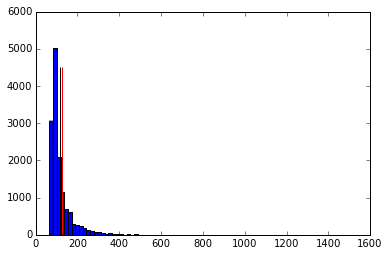

In [7]:
plt.hist(max_sides,bins=80)
plt.vlines([max_sides.mean()],0,4500)
plt.vlines([128],0,4500,'red')

In [8]:
import itertools

def view_grid_images(a,b, images_dict, imshow_args={}, **kwargs):
    fig, axes = plt.subplots(a,b, **kwargs)
    # iloczyn kartezjanski, zeby przeiterowac po gridzie plotu
    grid_list = list(itertools.product(*[range(a), range(b)]))
    for grid_coord, image_data in zip(grid_list, images_dict.iteritems()):
        Id, (img, label) = image_data
        x,y = grid_coord
        ax = axes[x][y]
        ax.imshow(img, **imshow_args)
        ax.set_xlabel(label)
    fig.tight_layout()
    
def df_to_dict(rows):
    return {Id: (open_image_id(Id),label) for  ind, (Id, label) in rows.iterrows()} 

def get_random_dict(n):
    new_ids = ids.sample(n)
    return df_to_dict(new_ids)

def view_random_samples(a,b, ids, **kwargs):
    images_dict = get_random_dict(a*b)
    view_grid_images(a,b, images_dict, **kwargs)
        

In [9]:
from skimage.transform import rescale
from skimage.util import pad

In [10]:
import math

def scale_image(img, desired_size):
    max_dim = max(img.shape[:2])
    scale = desired_size/(max_dim*1.0)
    return rescale(img, scale)

def compute_pad_size(side, desired_size):
    diff = desired_size-side
    half_a = math.floor(diff/2.0)
    half_b = math.ceil(diff/2.0)
    return int(half_a), int(half_b)

def center_image(img,desired_size):
    w, h = img.shape[:2]
    pad_w = compute_pad_size(w, desired_size)
    pad_h = compute_pad_size(h, desired_size)
    return pad(img,(pad_w,pad_h,(0,0)),mode='constant') 

def resize_img(img,desired_size):
    img1 = scale_image(img,desired_size)
    img1 = center_image(img1, desired_size)
    return img1

In [11]:
random_samples = get_random_dict(16)

In [12]:
for Id, (img, label) in random_samples.iteritems():
    random_samples[Id] = (resize_img(img,128), label)

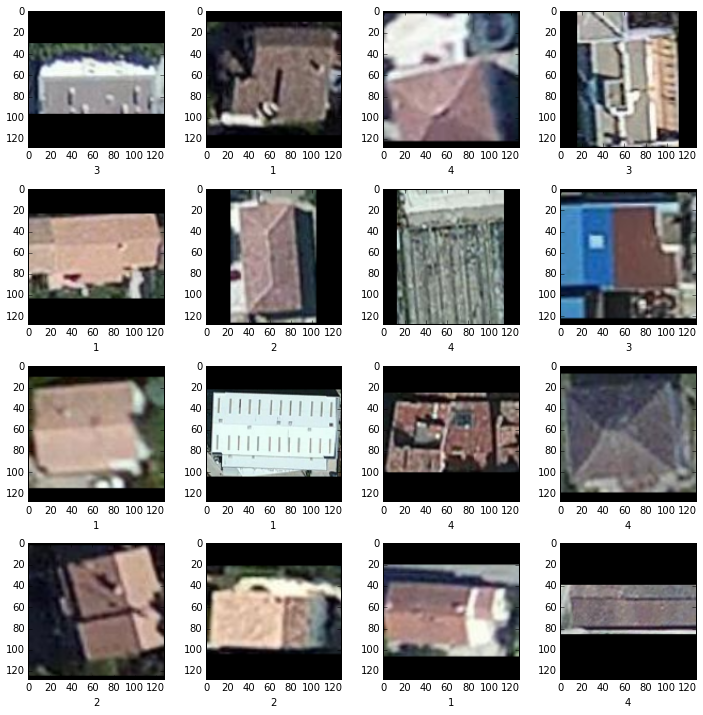

In [13]:
view_grid_images(4,4,random_samples,figsize=(10,10))

In [14]:
def resize_all(ids, desired_side_len):
    resized_data_folder = os.path.join(data_folder,'new_roof_images/resized')
    if not os.path.exists(resized_data_folder):
            os.makedirs(resized_data_folder)
    for ind, (Id, label) in ids.iterrows():
        data = {Id: (open_image_id(Id), label)}
        img = open_image_id(Id)
        new_img = resize_img(img, desired_side_len)
        im_path = os.path.join(resized_data_folder,str(Id)+'.bmp')
        imsave(im_path, new_img)

In [15]:
resize_all(ids, 128)

/net/software/local/python/2.7.9/lib/python2.7/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
